# Importing Dependencies

Pandas to read and analyse the csv files.

matplotlib to plot charts for better visiualization

In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Reading CSV Files

In [3]:
Walmart_stores = pd.read_csv("stores.csv")
Walmart_features = pd.read_csv("features.csv")

### Basic understanding of the dataset

In [4]:
Walmart_stores.head()  , Walmart_features.head() 

(   Store Type    Size
 0      1    A  151315
 1      2    A  202307
 2      3    B   37392
 3      4    A  205863
 4      5    B   34875,
    Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
 0      1  2010-02-05        42.31       2.572        NaN        NaN   
 1      1  2010-02-12        38.51       2.548        NaN        NaN   
 2      1  2010-02-19        39.93       2.514        NaN        NaN   
 3      1  2010-02-26        46.63       2.561        NaN        NaN   
 4      1  2010-03-05        46.50       2.625        NaN        NaN   
 
    MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
 0        NaN        NaN        NaN  211.096358         8.106      False  
 1        NaN        NaN        NaN  211.242170         8.106       True  
 2        NaN        NaN        NaN  211.289143         8.106      False  
 3        NaN        NaN        NaN  211.319643         8.106      False  
 4        NaN        NaN        NaN  211.350143     

In [5]:

def info():
    print("FEATURES COLUMNS")
    print(Walmart_features.columns)
    print("-"*100)
    print("STORES COLUMNS")
    print(Walmart_stores.columns)
    print("-"*100)
    print("-"*100)
    
    print("FEATURES dtypes")
    print(Walmart_features.dtypes)
    print("STORES dtypes")
    print("-"*100)
    print(Walmart_stores.dtypes)
    print("-"*100)
    print("-"*100)
    
    print("FEATURES info")
    print(Walmart_features.info())
    print("-"*100)
    print("STOES info")
    print(Walmart_stores.info())
    
    
    
    
info()


FEATURES COLUMNS
Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
----------------------------------------------------------------------------------------------------
STORES COLUMNS
Index(['Store', 'Type', 'Size'], dtype='object')
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
FEATURES dtypes
Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object
STORES dtypes
---------------------------------------------------------------------------------------------

Cleaning Data

In [14]:
Walmart_features.shape

(2069, 12)

In [15]:
Walmart_features = Walmart_features.dropna()

In [16]:
Walmart_features.shape

(2069, 12)

In [17]:

print(f"{8190 - 2069} rows contaning Null values removed ")


6121 rows contaning Null values removed 


In [18]:
Walmart_stores.shape

(45, 3)

In [19]:
Walmart_stores = Walmart_stores.dropna()

In [20]:
Walmart_stores.shape

(45, 3)

In [21]:
print(f"0 rows contaning Null values removed ")

0 rows contaning Null values removed 


# Deeper Dive into the Dataset

..Trying to derive out relationship / dependencies

## Relationships between unemployment and other criterias

In [22]:
max_unemployement = Walmart_features[Walmart_features['Unemployment'] == 
                 Walmart_features['Unemployment'].max()]

In [23]:
min_unemployement = Walmart_features[Walmart_features['Unemployment'] == 
                 Walmart_features['Unemployment'].min()]

In [24]:
max_unemployement

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
2094,12,2011-11-11,48.76,3.824,18049.87,7939.68,234.64,10463.07,5588.33,129.816710,12.89,False
2095,12,2011-11-18,54.20,3.813,5957.36,343.22,84.93,2390.67,12934.62,129.826833,12.89,False
2096,12,2011-11-25,53.25,3.622,5391.83,8.00,63143.29,49.27,2115.67,129.836400,12.89,True
2098,12,2011-12-09,42.17,3.644,8374.63,15.85,573.92,5849.71,37581.27,129.855533,12.89,False
2099,12,2011-12-16,43.29,3.600,4940.95,28.45,1038.30,1100.93,5243.21,129.898065,12.89,False
2100,12,2011-12-23,45.40,3.541,1797.35,15.98,839.84,1375.84,17699.26,129.984548,12.89,False
2101,12,2011-12-30,44.64,3.428,6982.02,58804.91,60.29,1268.21,3553.79,130.071032,12.89,True
5006,28,2011-11-11,48.76,3.824,22860.64,12223.82,343.77,20834.37,9895.33,129.816710,12.89,False
5007,28,2011-11-18,54.20,3.813,6772.46,1654.68,86.01,1068.35,9835.85,129.826833,12.89,False
5008,28,2011-11-25,53.25,3.622,2232.08,179.73,61319.72,513.76,1790.89,129.836400,12.89,True


In [25]:
min_unemployement

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
4169,23,2013-04-05,35.96,3.772,15085.79,4569.13,185.91,2067.42,2092.26,139.056903,3.684,False
4170,23,2013-04-12,39.54,3.723,3351.11,4315.25,73.52,1882.00,1737.99,139.122613,3.684,False
7263,40,2013-04-05,35.59,3.772,14110.29,5571.32,189.13,785.63,3892.09,139.056903,3.684,False
7264,40,2013-04-12,39.15,3.723,4934.33,3183.26,16.53,351.45,2203.32,139.122613,3.684,False
7265,40,2013-04-19,45.17,3.678,2322.79,1.59,20.10,133.68,1429.80,139.122613,3.684,False



#### CPI : The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services
    
#### MarkDown : Markdown is the reduction of a product's selling price




## Adding Year and Month Column to gain future ease of insights


In [26]:
Walmart_features['Year'] = pd.DatetimeIndex(Walmart_features['Date']).year 

In [45]:
Walmart_features['Month'] = pd.DatetimeIndex(Walmart_features['Date']).month

In [27]:
Walmart_features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Year'],
      dtype='object')

<BarContainer object of 2069 artists>

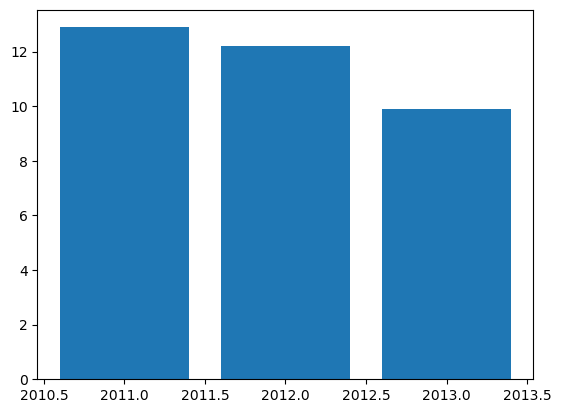

In [28]:
plt.bar(Walmart_features['Year'] , Walmart_features['Unemployment'])

<BarContainer object of 2069 artists>

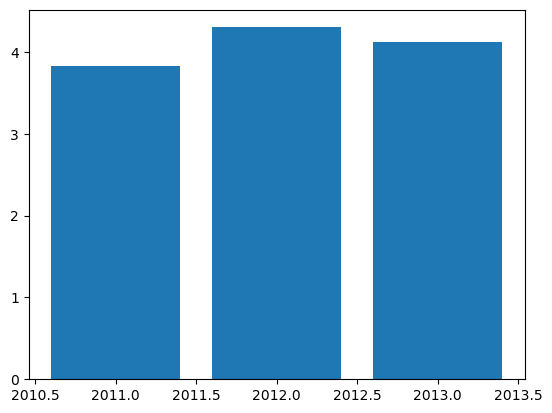

In [29]:
plt.bar(Walmart_features['Year'],
        Walmart_features['Fuel_Price'])


#### Inference : NO current relation between Fuel Price (econimies index) and umeployement was found


In [30]:
#Grouping Data by year

Year_grouped = Walmart_features.groupby('Year').mean()
Year_grouped

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Year,,,,,,,,,,,
2011,20.123596,42.860262,3.388438,5311.102697,8279.104082,8966.450674,1575.445918,6784.575655,173.513848,7.678356,0.269663
2012,20.348087,58.594336,3.651765,9403.682753,3422.472993,1652.516249,4067.615941,5274.675131,175.430393,7.304145,0.099775
2013,20.646055,40.741343,3.574629,13118.712090,5088.476738,113.657377,6128.480789,3454.447079,177.213979,6.863768,0.089552


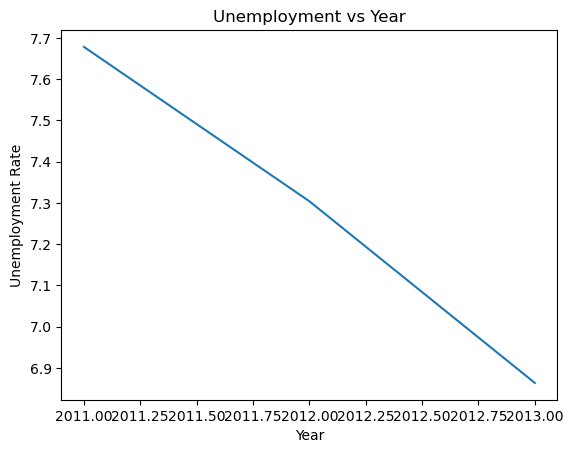

In [31]:
#Plotting VS Graphs

plt.title("Unemployment vs Year")
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.plot(Year_grouped['Unemployment'] )


#### Inference : Unemployment Decreased over the years


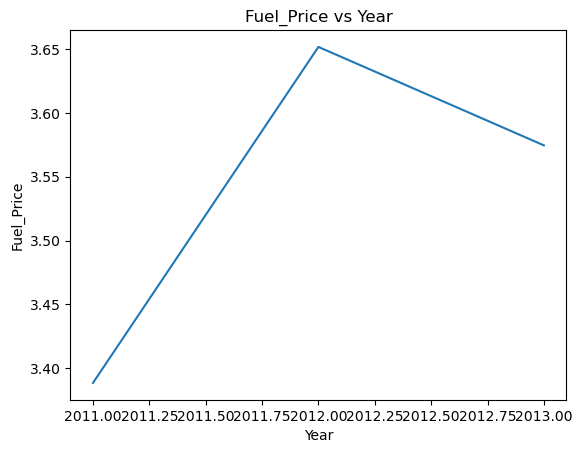

In [32]:
plt.title("Fuel_Price vs Year")
plt.xlabel('Year')
plt.ylabel('Fuel_Price')
plt.plot(Year_grouped['Fuel_Price'] )


#### Inference : Fuel Price peaked at 2012 and lowest at 2011


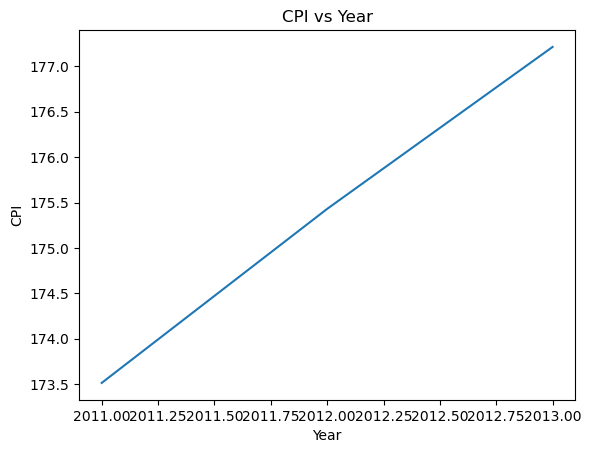

In [33]:
plt.title("CPI vs Year")
plt.xlabel('Year')
plt.ylabel('CPI')
plt.plot(Year_grouped['CPI'] )



#### Inference : CPI increased over the years



<BarContainer object of 2069 artists>

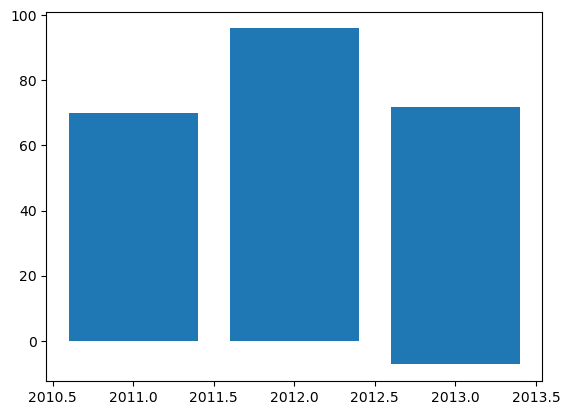

In [34]:
plt.bar(Walmart_features['Year'],Walmart_features['Temperature'])

In [36]:
Walmart_features['Quarter'] = pd.DatetimeIndex(Walmart_features['Date']).quarter

In [37]:
#Visualizing Quarterly Results

Quarter1 = Walmart_features.loc[Walmart_features['Quarter'] == 1]['CPI'].mean()
Quarter2 = Walmart_features.loc[Walmart_features['Quarter'] == 2]['CPI'].mean()
Quarter3 = Walmart_features.loc[Walmart_features['Quarter'] == 3]['CPI'].mean()
Quarter4 = Walmart_features.loc[Walmart_features['Quarter'] == 4]['CPI'].mean()

In [38]:
Quarterly = [Quarter1 , Quarter2 , Quarter3 , Quarter4]

([<matplotlib.patches.Wedge at 0x7fbea58b7f70>,
 [Text(0.813652001329258, 0.8126933128387935, 'Quarter1'),
  Text(-0.8113641919596233, 0.8149773911009481, 'Quarter2'),
  Text(-0.8107184082851996, -0.8156198026455174, 'Quarter3'),
  Text(0.8169420042577197, -0.8093860399583009, 'Quarter4')],
 [Text(0.459890261620885, 0.4593483942132311, '25.0%'),
  Text(-0.4585971519771784, 0.46063939497010103, '25.0%'),
  Text(-0.45823214381337357, -0.46100249714746633, '25.2%'),
  Text(0.46174982849349366, -0.45747906606338745, '24.9%')])

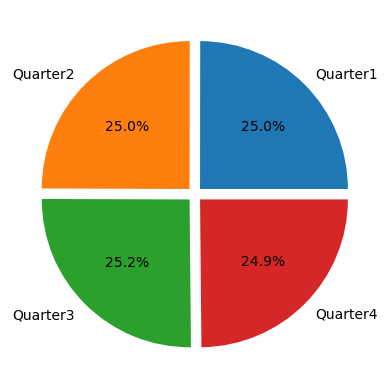

In [39]:
plt.pie(Quarterly , 
        labels=['Quarter1' , 'Quarter2' , 'Quarter3' , 'Quarter4'],
       explode = [0.05, 0.05 , 0.05 , 0.05],
       autopct='%.1f%%')


#### Inference : AS the CPI remains almost constant throughout the Quarter, the sales of walmart is not seasonal


In [40]:
#Comparing Store Size

A = Walmart_stores.loc[ Walmart_stores['Type'] == "A"].sum()[2]
B = Walmart_stores.loc[ Walmart_stores['Type'] == "B"].sum()[2]
C = Walmart_stores.loc[ Walmart_stores['Type'] == "C"].sum()[2]
stores = [A , B , C]

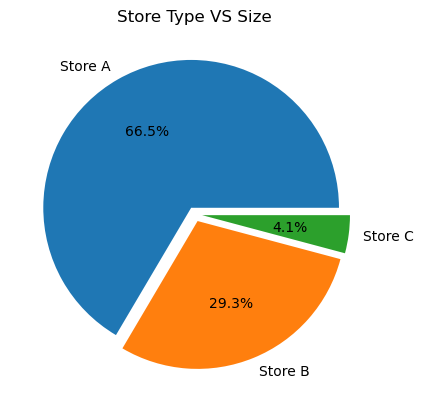

In [41]:
plt.pie(stores , 
        labels=['Store A' , 'Store B' , 'Store C'] ,
         explode = [0.05, 0.05 , 0.05],
           autopct='%.1f%%')
plt.title('Store Type VS Size')
plt.show()


### Inference : 

#### Store of type A : 66.5%
#### Store of type B : 29.3%
#### Store of type C : 4.1%


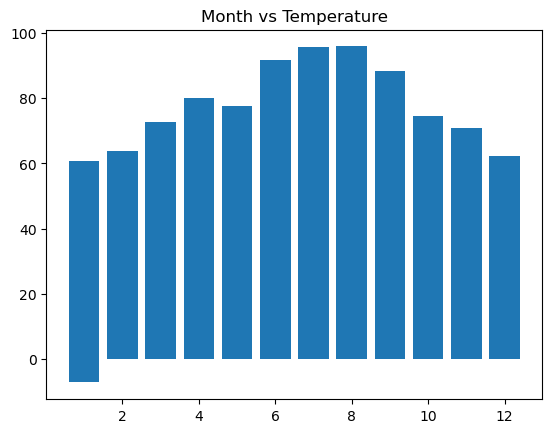

In [47]:
plt.bar(Walmart_features['Month'] , Walmart_features['Temperature'])
plt.title('Month vs Temperature')
plt.show()


### Inference : 

#### Temperature is at peak between June and August



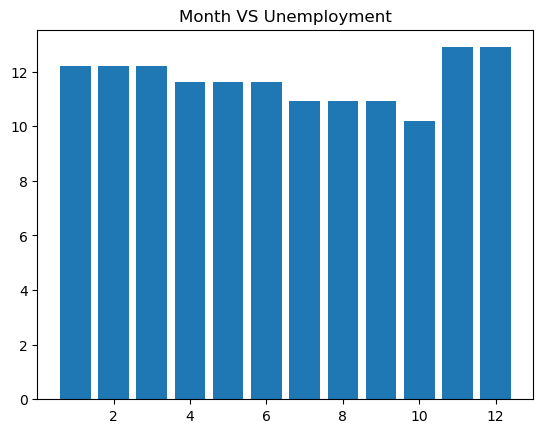

In [48]:
plt.bar(Walmart_features['Month'] , Walmart_features['Unemployment'])
plt.title('Month VS Unemployment')
plt.show()


### Inference : 

#### Unemployment is at peak between October and December (Year end)



In [49]:
eleven = Walmart_features.loc[Walmart_features['Year'] == 2011]
twelve = Walmart_features.loc[Walmart_features['Year'] == 2012]
thirteen = Walmart_features.loc[Walmart_features['Year'] == 2013]

holidays = [len(eleven.loc[eleven['IsHoliday'] == True]) , 
           len(twelve.loc[twelve['IsHoliday'] == True]) ,
            len(thirteen.loc[thirteen['IsHoliday'] == True])]

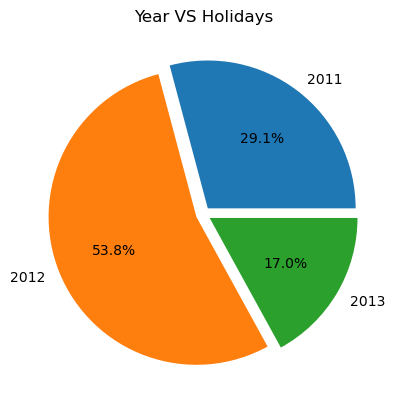

In [50]:
plt.pie(holidays , 
        labels=['2011' , '2012' , '2013'] ,
        explode = [0.05, 0.05 , 0.05],
        autopct='%.1f%%')
plt.title('Year VS Holidays')
plt.show()


### Inference : 

#### from Above Graphs

#### 2012 had the largest number of holidays 
#### 2012 had the highest Fuel Price
#### 2012 had the highest temperatue
#### 2012 had the second highest Unemployement percentage



In [51]:
Walmart_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Quarter,Month
92,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,2011,4,11
93,1,2011-11-18,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False,2011,4,11
94,1,2011-11-25,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True,2011,4,11
95,1,2011-12-02,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False,2011,4,12
96,1,2011-12-09,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False,2011,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8168,45,2013-03-01,39.72,3.890,6614.32,147.82,5.60,27.55,1668.95,193.122173,8.625,False,2013,1,3
8169,45,2013-03-08,36.13,3.860,16382.54,88.67,34.62,3096.92,3486.91,193.211524,8.625,False,2013,1,3
8173,45,2013-04-05,43.94,3.763,16427.83,5341.41,182.59,1523.83,1743.09,193.516047,8.335,False,2013,2,4
8174,45,2013-04-12,57.39,3.724,8760.15,1713.11,21.08,1302.31,1380.74,193.589304,8.335,False,2013,2,4



# Conclusion:

#### Unemployment Decreased over the years.

#
#### NO Direct relation between Fuel Price (econimies index) and umeployement was found.
#
#### Indirect relationship between Fuel Price (econimies index) and umeployement: 
####           2012 had the highest Fuel Price.
####            2012 had the second highest Unemployement percentage.
#         
#### Fuel Price peaked at 2012 and lowest at 2011.
#
#### CPI increased over the years.
#

#### AS the CPI remains almost constant throughout the Quarter, the sales of walmart is not seasonal
#### Quarter 1 : 25%
#### Quarter 2 : 25%
#### Quarter 3 : 25.2%
#### Quarter 4 : 24.9%
#
#### Store of type A Size : 66.5%
#### Store of type B Size : 29.3%
#### Store of type C Size : 4.1%
#

#### Temperature is at peak between June and August.


#### Unemployment is at peak between October and December (Year end).
 